In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# constants
RAW_DATA_PATH = "resources/data.csv"
custom_palette = ['#8ECAE6', '#219EBC', '#FFB703', '#FB8500']

In [3]:
# Read in the data.
df = pd.read_csv(RAW_DATA_PATH)
df.head()

,Unnamed: 0,id,bathrooms,bedrooms,fee,price,square_feet,cityname,state,latitude,longitude,date,price_per_square_ft
0,0,5668640009,1.0,1.0,No,2195.0,542,Redondo Beach,CA,33.8520,-118.3759,2019-12-26,4.049815
1,1,5668639818,1.5,3.0,No,1250.0,1500,Newport News,VA,37.0867,-76.4941,2019-12-26,0.833333
2,2,5668639686,2.0,3.0,No,1395.0,1650,Raleigh,NC,35.8230,-78.6438,2019-12-26,0.845455
3,3,5668639659,1.0,2.0,No,1600.0,820,Vacaville,CA,38.3622,-121.9712,2019-12-26,1.951220
4,4,5668639374,1.0,1.0,No,975.0,624,Albuquerque,NM,35.1038,-106.6110,2019-12-26,1.562500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99004 entries, 0 to 99003
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           99004 non-null  int64  
 1   id                   99004 non-null  int64  
 2   bathrooms            99004 non-null  float64
 3   bedrooms             99004 non-null  float64
 4   fee                  99004 non-null  object 
 5   price                99004 non-null  float64
 6   square_feet          99004 non-null  int64  
 7   cityname             99004 non-null  object 
 8   state                99004 non-null  object 
 9   latitude             99004 non-null  float64
 10  longitude            99004 non-null  float64
 11  date                 99004 non-null  object 
 12  price_per_square_ft  99004 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 9.8+ MB


## SEVEN'S WORK STARTS HERE
### Seasonal Trends: Are there any patterns in apartment price increases or decreases during the year?

In [5]:
# Convert the date column to datetime
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99004 entries, 0 to 99003
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           99004 non-null  int64         
 1   id                   99004 non-null  int64         
 2   bathrooms            99004 non-null  float64       
 3   bedrooms             99004 non-null  float64       
 4   fee                  99004 non-null  object        
 5   price                99004 non-null  float64       
 6   square_feet          99004 non-null  int64         
 7   cityname             99004 non-null  object        
 8   state                99004 non-null  object        
 9   latitude             99004 non-null  float64       
 10  longitude            99004 non-null  float64       
 11  date                 99004 non-null  datetime64[ns]
 12  price_per_square_ft  99004 non-null  float64       
dtypes: datetime64[ns](1), float64(6

In [6]:
df.head()

,Unnamed: 0,id,bathrooms,bedrooms,fee,price,square_feet,cityname,state,latitude,longitude,date,price_per_square_ft
0,0,5668640009,1.0,1.0,No,2195.0,542,Redondo Beach,CA,33.8520,-118.3759,2019-12-26,4.049815
1,1,5668639818,1.5,3.0,No,1250.0,1500,Newport News,VA,37.0867,-76.4941,2019-12-26,0.833333
2,2,5668639686,2.0,3.0,No,1395.0,1650,Raleigh,NC,35.8230,-78.6438,2019-12-26,0.845455
3,3,5668639659,1.0,2.0,No,1600.0,820,Vacaville,CA,38.3622,-121.9712,2019-12-26,1.951220
4,4,5668639374,1.0,1.0,No,975.0,624,Albuquerque,NM,35.1038,-106.6110,2019-12-26,1.562500


### Feature Engineering: Create new column for seasons

In [7]:
# Create a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # 9, 10, 11
        return 'Fall'

# Apply the function to the date column
df['season'] = df['date'].dt.month.apply(get_season)

df.head()

,Unnamed: 0,id,bathrooms,bedrooms,fee,price,square_feet,cityname,state,latitude,longitude,date,price_per_square_ft,season
0,0,5668640009,1.0,1.0,No,2195.0,542,Redondo Beach,CA,33.8520,-118.3759,2019-12-26,4.049815,Winter
1,1,5668639818,1.5,3.0,No,1250.0,1500,Newport News,VA,37.0867,-76.4941,2019-12-26,0.833333,Winter
2,2,5668639686,2.0,3.0,No,1395.0,1650,Raleigh,NC,35.8230,-78.6438,2019-12-26,0.845455,Winter
3,3,5668639659,1.0,2.0,No,1600.0,820,Vacaville,CA,38.3622,-121.9712,2019-12-26,1.951220,Winter
4,4,5668639374,1.0,1.0,No,975.0,624,Albuquerque,NM,35.1038,-106.6110,2019-12-26,1.562500,Winter


In [8]:
df.groupby("season").size()

season
Fall      43154
Spring      358
Summer      934
Winter    54558
dtype: int64

### Find average monthly rental price by season and month

In [9]:
seasonal_summary = df.groupby("season")["price"].mean()
seasonal_summary

season
Fall      1613.046786
Spring    1629.756983
Summer    1304.582441
Winter    1459.499780
Name: price, dtype: float64

In [10]:
monthly_summary = df.groupby(df["date"].dt.month)["price"].mean()
monthly_summary

date
1     1461.134454
2     1425.739312
3     1598.825758
4     1636.168224
5     1658.302521
6     1402.077381
7     1213.551724
8     1390.208609
9     1611.981204
10    2122.187500
11    1884.040816
12    1504.745829
Name: price, dtype: float64

---
### Now that the data is grouped by average rental price during seasons and months, we can show trends using various graphs.

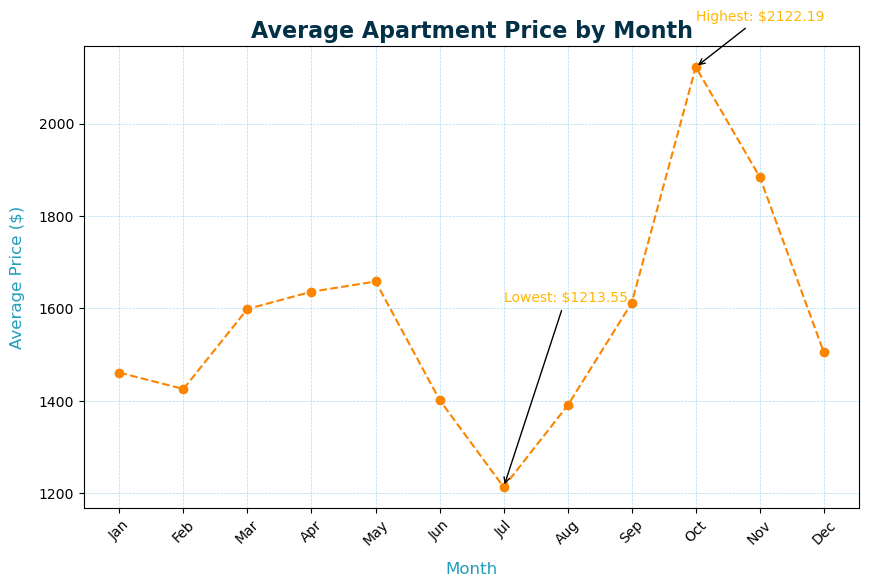

In [11]:
# Line plot for average prices by month
monthly_summary.plot(kind='line', figsize=(10, 6), color='#FB8500', linestyle='--', marker='o', markersize=6)

# Title and axis labels
plt.title("Average Apartment Price by Month", fontsize=16, fontweight='bold', color='#023047')
plt.xlabel("Month", fontsize=12, labelpad=10, color='#219EBC')
plt.ylabel("Average Price ($)", fontsize=12, labelpad=10, color='#219EBC')

# Customize x-ticks for months
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add grid
plt.grid(color='#8ECAE6', linestyle='--', linewidth=0.5, alpha=0.7)

# Annotate Highest Price
plt.annotate(f'Highest: ${monthly_summary.max():.2f}', 
             xy=(monthly_summary.idxmax(), monthly_summary.max()), 
             xytext=(monthly_summary.idxmax(), monthly_summary.max() + 100), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, color='#FFB703')

# Annotate Lowest Price
plt.annotate(f'Lowest: ${monthly_summary.min():.2f}', 
             xy=(monthly_summary.idxmin(), monthly_summary.min()), 
             xytext=(monthly_summary.idxmin(), monthly_summary.min() + 400), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, color='#FFB703')

# Show the plot
plt.savefig("images/lineplot-price-per-month.png", dpi=300, bbox_inches="tight")

plt.show()

**Analysis:** 

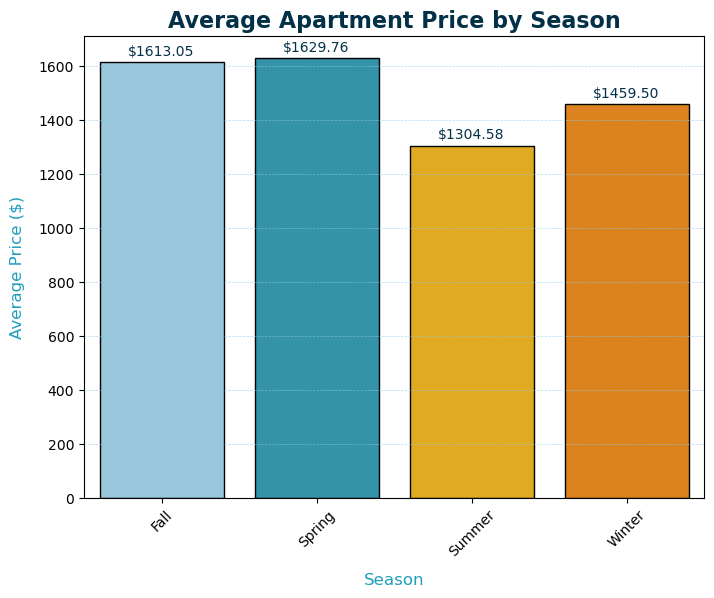

In [12]:
# a bar plot to show average prices by season

plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_summary.index, y=seasonal_summary.values, palette=custom_palette, edgecolor='black')

# Title and axis labels
plt.title("Average Apartment Price by Season", fontsize=16, fontweight='bold', color='#023047')
plt.xlabel("Season", fontsize=12, labelpad=10, color='#219EBC')
plt.ylabel("Average Price ($)", fontsize=12, labelpad=10, color='#219EBC')

# Annotate bars with values
for index, value in enumerate(seasonal_summary.values):
    plt.text(index, value + 25, f"${value:.2f}", ha='center', fontsize=10, color='#023047')

# Add grid and background color
plt.grid(axis='y', color='#8ECAE6', linestyle='--', linewidth=0.5, alpha=0.7)
#plt.gca().set_facecolor('#F0F0F0')

# Rotate x-axis ticks
plt.xticks(rotation=45, fontsize=10)


plt.savefig("images/barplot-price-per-season.png", dpi=300, bbox_inches="tight")
plt.show()

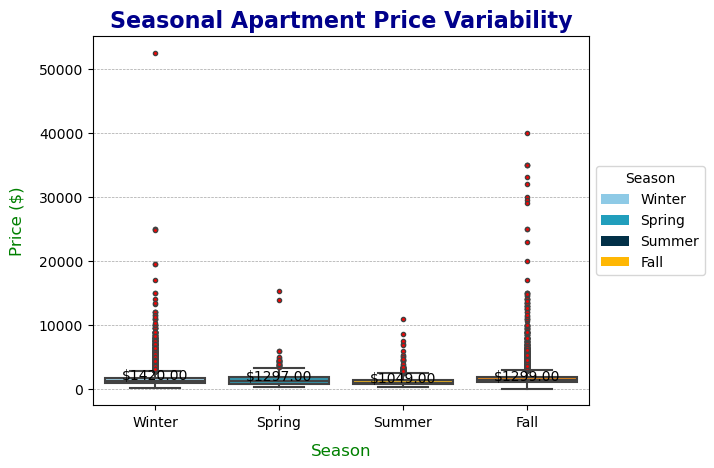

In [13]:
# variability in apartment prices within each season using a box plot
from matplotlib.patches import Patch

sns.boxplot(x="season", y="price", data=df, order=["Winter", "Spring", "Summer", "Fall"], palette=custom_palette,
            flierprops=dict(marker='o', markerfacecolor='red', markersize=3))

# Title and labels
plt.title("Seasonal Apartment Price Variability", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Season", fontsize=12, labelpad=10, color='green')
plt.ylabel("Price ($)", fontsize=12, labelpad=10, color='green')

# Legend
legend_elements = [
    Patch(facecolor='#8ECAE6', label='Winter'),
    Patch(facecolor='#219EBC', label='Spring'),
    Patch(facecolor='#023047', label='Summer'),
    Patch(facecolor='#FFB703', label='Fall')
]
plt.legend(handles=legend_elements, title="Season", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

# Annotate medians
median_price = df.groupby("season")["price"].median()
for i, median in enumerate(median_price):
    plt.text(i, median + 50, f"${median:.2f}", ha='center', fontsize=10, color='black')

# Add grid and background
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
#plt.gca().set_facecolor('#F0F0F0')

plt.savefig("images/boxplot-price-per-season.png", dpi=300, bbox_inches="tight")
plt.show()

In [14]:
# a statistical test (ANOVA) to check if the differences in seasonal prices are significant
# If p-value < 0.05, the differences in seasonal averages are statistically significant.

# Split data into seasonal groups
winter_prices = df[df["season"] == "Winter"]["price"]
spring_prices = df[df["season"] == "Spring"]["price"]
summer_prices = df[df["season"] == "Summer"]["price"]
fall_prices = df[df["season"] == "Fall"]["price"]

# Perform one-way ANOVA
f_stat, p_value = st.f_oneway(winter_prices, spring_prices, summer_prices, fall_prices)
print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 256.9905060727388
p-value: 3.788913292327373e-166


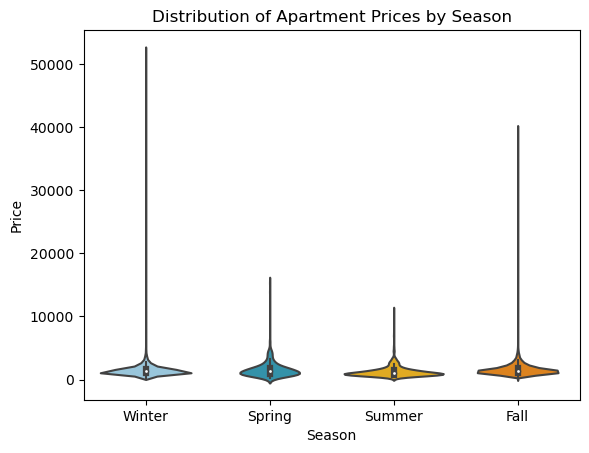

In [15]:
# violin plot

sns.violinplot(x="season", y="price", data=df, order=["Winter", "Spring", "Summer", "Fall"], palette=custom_palette)
plt.title("Distribution of Apartment Prices by Season")
plt.xlabel("Season")
plt.ylabel("Price")

plt.savefig("images/violinplot-price-per-season.png", dpi=300, bbox_inches="tight")
plt.show()

---
## Here is a look at seasonal and monthly averages by price per square foot

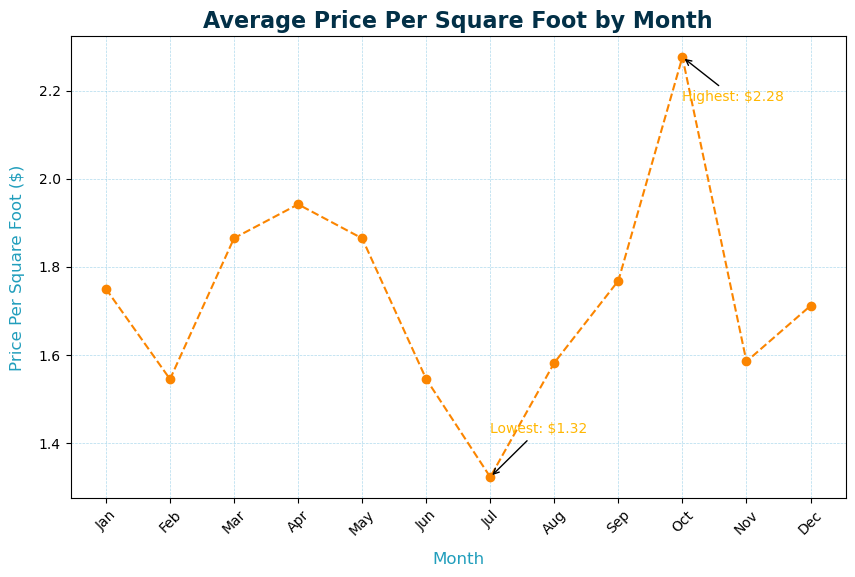

In [16]:
# line plot

# Group the data by month and calculate the average price per square foot
monthly_summary = df.groupby(df['date'].dt.month)["price_per_square_ft"].mean()

# Plot the line chart with customizations
monthly_summary.plot(kind='line', figsize=(10, 6), color='#FB8500', linestyle='--', marker='o', markersize=6)

# Title and axis labels
plt.title("Average Price Per Square Foot by Month", fontsize=16, fontweight='bold', color='#023047')
plt.xlabel("Month", fontsize=12, labelpad=10, color='#219EBC')
plt.ylabel("Price Per Square Foot ($)", fontsize=12, labelpad=10, color='#219EBC')

# Customize x-ticks for months
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add grid
plt.grid(color='#8ECAE6', linestyle='--', linewidth=0.5, alpha=0.7)

# Annotate Highest Price
plt.annotate(f'Highest: ${monthly_summary.max():.2f}', 
             xy=(monthly_summary.idxmax(), monthly_summary.max()), 
             xytext=(monthly_summary.idxmax(), monthly_summary.max() - 0.1), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, color='#FFB703')

# Annotate Lowest Price
plt.annotate(f'Lowest: ${monthly_summary.min():.2f}', 
             xy=(monthly_summary.idxmin(), monthly_summary.min()), 
             xytext=(monthly_summary.idxmin(), monthly_summary.min() + 0.1), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, color='#FFB703')

# Show the plot
plt.savefig("images/lineplot-sqft-per-month.png", dpi=300, bbox_inches="tight")
plt.show()

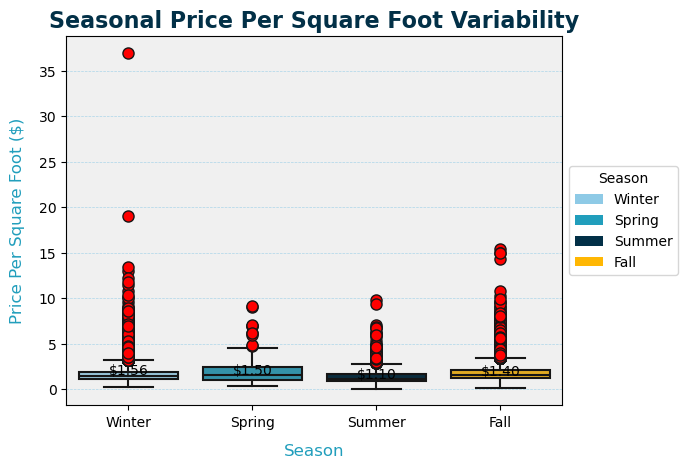

In [18]:
# box plot showing average price per square foot by season

# Create the box plot for price per square foot by season
sns.boxplot(x="season", y="price_per_square_ft", data=df, order=["Winter", "Spring", "Summer", "Fall"], palette=custom_palette,
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

# Title and axis labels
plt.title("Seasonal Price Per Square Foot Variability", fontsize=16, fontweight='bold', color='#023047')
plt.xlabel("Season", fontsize=12, labelpad=10, color='#219EBC')
plt.ylabel("Price Per Square Foot ($)", fontsize=12, labelpad=10, color='#219EBC')

# Legend for the custom palette
legend_elements = [
    Patch(facecolor='#8ECAE6', label='Winter'),
    Patch(facecolor='#219EBC', label='Spring'),
    Patch(facecolor='#023047', label='Summer'),
    Patch(facecolor='#FFB703', label='Fall')
]
plt.legend(handles=legend_elements, title="Season", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

# Annotate medians
median_price_per_sqft = df.groupby("season")["price_per_square_ft"].median()
for i, median in enumerate(median_price_per_sqft):
    plt.text(i, median + 0.1, f"${median:.2f}", ha='center', fontsize=10, color='black')

# Add grid and background
plt.grid(axis='y', color='#8ECAE6', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor('#F0F0F0')

# Show the plot
plt.savefig("images/boxplot-sqft-per-season.png", dpi=300, bbox_inches="tight")
plt.show()

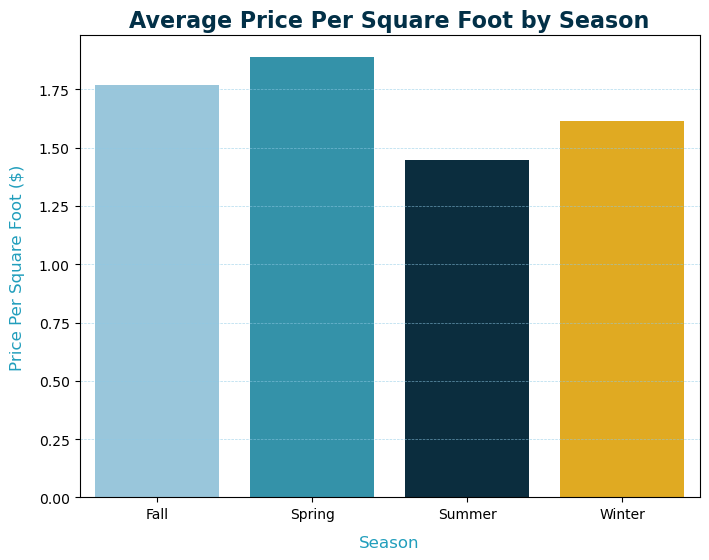

In [19]:
# bar plot showing average price per square foot by season

seasonal_summary = df.groupby("season")["price_per_square_ft"].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_summary.index, y=seasonal_summary.values, palette=custom_palette)
plt.title("Average Price Per Square Foot by Season", fontsize=16, fontweight='bold', color='#023047')
plt.xlabel("Season", fontsize=12, labelpad=10, color='#219EBC')
plt.ylabel("Price Per Square Foot ($)", fontsize=12, labelpad=10, color='#219EBC')


plt.grid(axis='y', color='#8ECAE6', linestyle='--', linewidth=0.5, alpha=0.7)

plt.savefig("images/barplot-sqft-per-season.png", dpi=300, bbox_inches="tight")
plt.show()

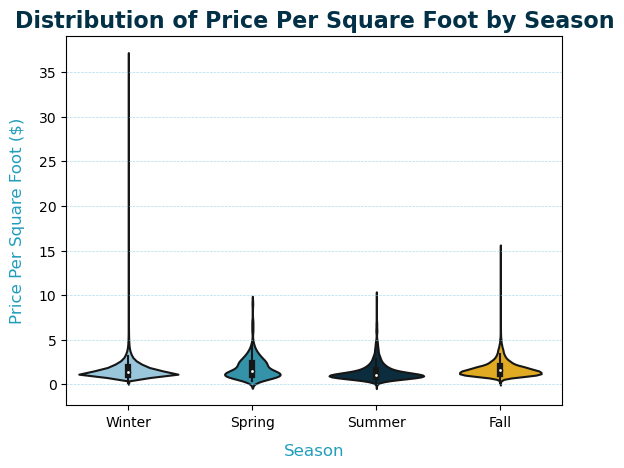

In [20]:
# violin plot showing average price per square foot by season

sns.violinplot(x="season", y="price_per_square_ft", data=df, order=["Winter", "Spring", "Summer", "Fall"], palette=custom_palette)
plt.title("Distribution of Price Per Square Foot by Season", fontsize=16, fontweight='bold', color='#023047')
plt.xlabel("Season", fontsize=12, labelpad=10, color='#219EBC')
plt.ylabel("Price Per Square Foot ($)", fontsize=12, labelpad=10, color='#219EBC')
plt.grid(axis='y', color='#8ECAE6', linestyle='--', linewidth=0.5, alpha=0.7)

plt.savefig("images/violinplot-sqft-per-season.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\seven\anaconda3\envs\dev\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


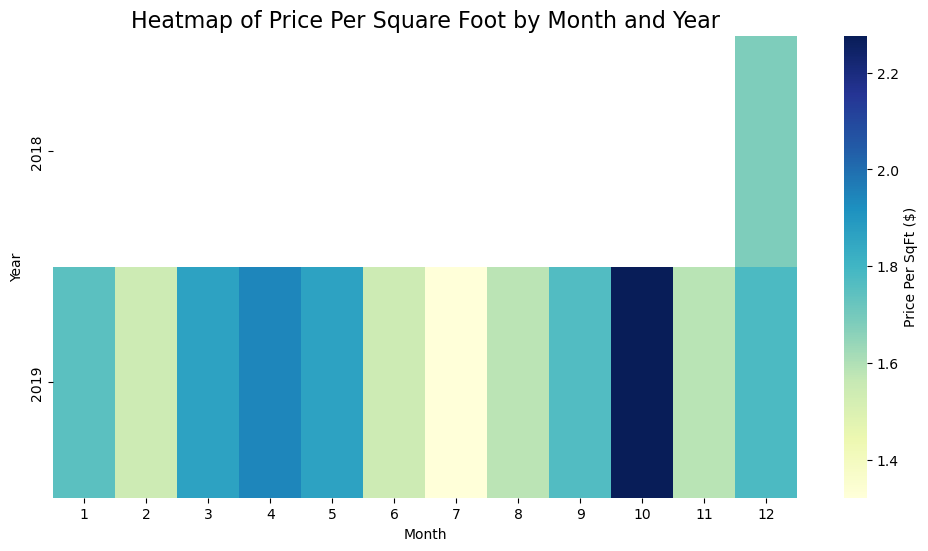

In [21]:
# heat map showing average price per square foot by month and year

heatmap_data = df.groupby([df['date'].dt.year, df['date'].dt.month])["price_per_square_ft"].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'Price Per SqFt ($)'})
plt.title("Heatmap of Price Per Square Foot by Month and Year", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Year")

plt.savefig("images/heatmap-sqft-per-month-year.png", dpi=300, bbox_inches="tight")
plt.show()

---
### One problem with this dataset is that it starts and ends in Winter over the course of one year, so all seasons have only one year of data except for Winter, which has 2 years.

In [22]:
df["year"] = df["date"].dt.year

seasonal_counts = df.groupby(["year", "season"])["price"].count().unstack()
seasonal_counts

season,Fall,Spring,Summer,Winter
year,,,,
2018,NaN,NaN,NaN,16042.0
2019,43154.0,358.0,934.0,38516.0


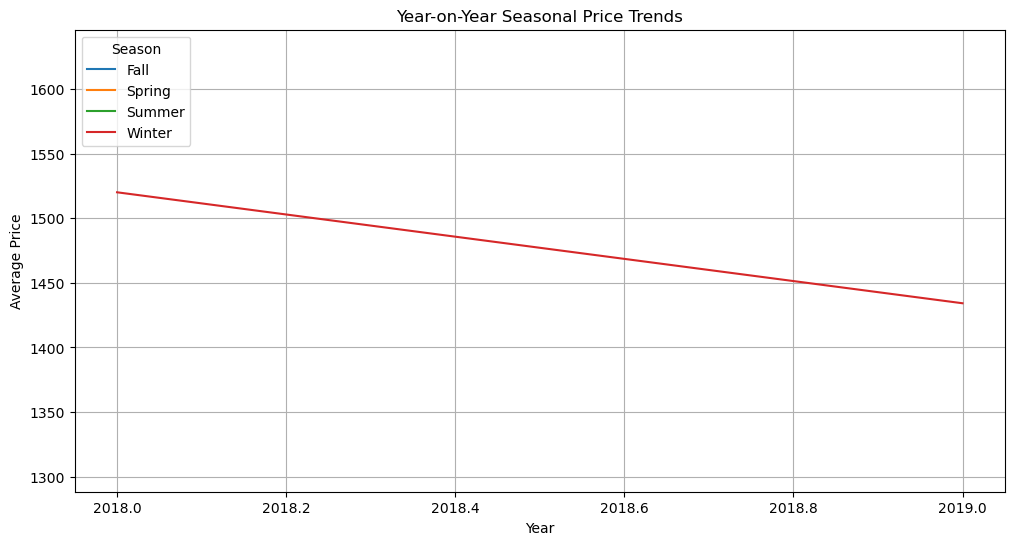

In [23]:
# compare year-on-year seasonal trends
yearly_seasonal_summary = df.groupby(["year", "season"])["price"].mean().unstack()

yearly_seasonal_summary.plot(kind="line", figsize=(12, 6))
plt.title("Year-on-Year Seasonal Price Trends")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.legend(title="Season")
plt.grid()
plt.show()